In [1]:
# General exploration of VOLCAT retrievals for Bezymianny eruption in October 2020.

In [2]:
%load_ext autoreload

In [3]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
from monetio.models import hysplit
from utilvolc import volcMER
from utilvolc import volcat

In [5]:
%autoreload
#vidA = 'v300250'
#d1 = datetime.datetime(2020,10,21,22)
#d2 = datetime.datetime(2020,10,21,23)
#tdir = '/pub/ECMWF/JPSS/VOLCAT/Bezymianny/Ash/pc_corrected_4/'


In [6]:
# Example of information in the VOLCAT filename.
%autoreload
tdir = '../data/volcat/'
vidA = 'v300250'
import glob
fnames = glob.glob(tdir +'VOLCAT*')
print(fnames[0])
vn = volcat.VolcatName(fnames[0])
vn.vhash

../data/volcat/VOLCAT_HIMAWARI-8_FLDK_s2020295_210000_v300250_VCB_w167_FLDK_b2020295_204000_g001_pc_rg.nc


{'algorithm name': 'VOLCAT',
 'satellite platform': 'HIMAWARI-8',
 'event scanning strategy': 'FLDK',
 'image date': 's2020295',
 'image time': '210000',
 'volcano id': 'v300250',
 'description': 'VCB',
 'WMO satellite id': 'w167',
 'image scanning strategy': 'FLDK',
 'event date': 'b2020295',
 'event time': '204000',
 'feature id': 'g001',
 'idate': datetime.datetime(2020, 10, 21, 21, 0),
 'edate': datetime.datetime(2020, 10, 21, 20, 40),
 'filename': '../data/volcat/VOLCAT_HIMAWARI-8_FLDK_s2020295_210000_v300250_VCB_w167_FLDK_b2020295_204000_g001_pc_rg.nc'}

### Create EMIT TIMES file from VOLCAT

In [7]:
%autoreload
from utilvolc import write_emitimes
d1 = datetime.datetime(2020,10,22,4)
wdir = '/hysplit-users/alicec/projects/bezy/RunDI/'
vdir = '/pub/ECMWF/JPSS/VOLCAT/Bezymianny/Ash/'
#iv = write_emitimes.InsertVolcat(wdir, vdir, d1, pollnum=1, pollpercents=[1],vid=300250)

In [8]:
%autoreload
#iv.get_area(write=True,correct_parallax=False)

In [9]:
%autoreload
#iv.set_duration("0001")
#iv.write_emit(correct_parallax=False)

### Write Parallax corrected files

In [10]:
#%autoreload
# CODE to write parallax corrected files.
#tdir = '../data/volcat/'
#vidA = 'v300250'
#d1 = datetime.datetime(2020,10,21,20,0)
#d2 = datetime.datetime(2020,10,22,20,0)
# this gets the original array.
#odas = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA,correct_parallax=False,mask_and_scale=False)
#volcat.write_parallax_corrected_files(tdir,wdir,vid=vidA,verbose=True,daterange=[d1,d2])

### Load volcat files and create plots

In [11]:
%autoreload
# load volcat files. Parallax corrected but not regridded.
tdir = '../data/volcat_pc/'
bezyloc = [160.587,55.978]
d1 = datetime.datetime(2020,10,21,20,0)
d2 = datetime.datetime(2020,10,22,20,0)
tlist = volcat.find_volcat(tdir,daterange=None,vid=vidA,return_val=1,verbose=True)
das = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA)

Not VOLCAT filename BezyVolcat_0p1.nc


In [12]:
import cartopy
from utilhysplit.plotutils import vtools

transform = cartopy.crs.PlateCarree()
def finish_plot(ax):
    transform = cartopy.crs.PlateCarree()


In [13]:
from matplotlib.colors import BoundaryNorm
sns.set()


cmap2 = plt.get_cmap('PuRd')
levels = np.arange(0,0.25,0.025)
levels = [0.1,0.2,0.5,1,2,5,10,20]
norm = BoundaryNorm(levels, ncolors=cmap2.N,clip=False)



# plot ash mass loading and ash height.
iii=130  # index of time period to plot.
#----------------------------------------
xmin = 155
xmax = 167
ymin = 51
ymax = 60
for iii in np.arange(0,len(das),1):
    vht  = volcat.get_mass(das[iii],clip=True)
    x = vht.isel(time=0).longitude
    y = vht.isel(time=0).latitude
    z = vht.isel(time=0).values
    fig, ax = plt.subplots(1,1,subplot_kw={'projection':transform})
    
    #vht  = volcat.get_mass(das[iii],clip=True)
    sns.set()
    #vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap="Reds",transform=transform)
    cb = ax.pcolormesh(x,y,z,transform=transform,cmap=cmap2,norm=norm)
    cb2 = plt.colorbar(cb)
    cb2.set_label('g/m$^2$')
    vtools.format_plot(ax,transform)
    plt.plot(bezyloc[0],bezyloc[1],'m^')
    ax = plt.gca()
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    plt.title(vht.time.values[0])
    plt.savefig('./animations/bezy_volcat_mass{:03d}.png'.format(iii))
    plt.close()
    
    #plt.savefig('bezy_volcat_2040_ht.png')
    #print(np.max(vht))
    #plt.show()

    #vht  = volcat.get_mass(das[iii],clip=True)
    #sns.set()
    #vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap='Reds')
    #plt.plot(bezyloc[0],bezyloc[1],'m^')
    #plt.savefig('./animations/bezy_volcat_mass{:03d}.png'.format(iii))
    #print(np.max(vht))
    plt.show()

#vht.isel(time=0).plot.pcolormesh(1

HT 4 km : MER 2.25e+02 kg/s
HT 5 km : MER 3.18e+03 kg/s
HT 6 km : MER 1.58e+04 kg/s
HT 7 km : MER 5.02e+04 kg/s
HT 8 km : MER 1.24e+05 kg/s
HT 9 km : MER 2.59e+05 kg/s
HT 10 km : MER 4.85e+05 kg/s
HT 11 km : MER 8.37e+05 kg/s
HT 12 km : MER 1.36e+06 kg/s
HT 13 km : MER 2.09e+06 kg/s
HT 14 km : MER 3.09e+06 kg/s
HT 15 km : MER 4.41e+06 kg/s
HT 16 km : MER 6.13e+06 kg/s


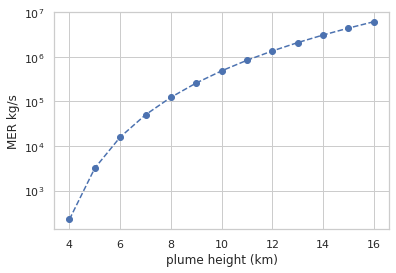

In [14]:
# how various plume heights correspond to MER according to Mastin equation.
sns.set()
sns.set_style('whitegrid')
vent = 2.88 #km  (9,455 ft)
htlist = [4,5,6,7,8,9,10,11,12,13,14,15,16]
merlist = []
for ht in htlist:
    ht2 = ht - vent
    MER = volcMER.mastinMER(ht2)
    print('HT {} km : MER {:0.2e} kg/s'.format(ht, MER))
    merlist.append(MER)
    
plt.plot(htlist, merlist, '--bo')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xlabel('plume height (km)')
ax.set_ylabel('MER kg/s')
plt.savefig('Mastin_mer_bezy.png')

### Define VolcatPlots object and create some plots

In [15]:
%autoreload
from utilvolc import volcat_plots as vp
volcplot = vp.VolcatPlots(das)
volcplot.make_arrays()

['2020-10-22T19:50:00.000000000']
['2020-10-21T20:40:00.000000000']


                 date  ens       mean   variance  skewness  kurtosis    N  \
0 2020-10-21 20:40:00  obs  19.367031  51.141304  0.384736 -1.012088   20   
1 2020-10-21 20:50:00  obs  19.324587  27.251595 -0.559220 -0.748548   78   
2 2020-10-21 21:00:00  obs  19.679558  27.766211 -1.117705  0.349934  108   
3 2020-10-21 21:10:00  obs  19.944813  20.013948 -1.059228  0.916527  140   
4 2020-10-21 21:20:00  obs  18.885668  27.604706 -0.526252  0.371643  188   
5 2020-10-21 21:30:00  obs  17.426096  30.933302 -0.172561  0.208943  232   
6 2020-10-21 21:40:00  obs  14.553114  30.821997 -0.057558  0.083122  336   
7 2020-10-21 21:50:00  obs  13.169525  35.823322 -0.136464 -0.259315  388   
8 2020-10-21 22:00:00  obs  11.161583  31.541100  0.127222 -0.375124  419   
9 2020-10-21 22:10:00  obs   9.280852  23.234221  0.330882 -0.565596  462   

        min        max  
0  7.977334  33.185036  
1  7.459611  28.425510  
2  3.303582  26.825644  
3  5.616934  27.548389  
4  2.732705  32.849030  
5 

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


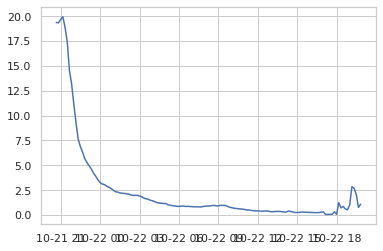

In [16]:
%autoreload
df = volcplot.volcat_describe_plot()
print(df[0:10])
#print(df.date)
#print(df.mean)
plt.plot(df.date, df['mean'])

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


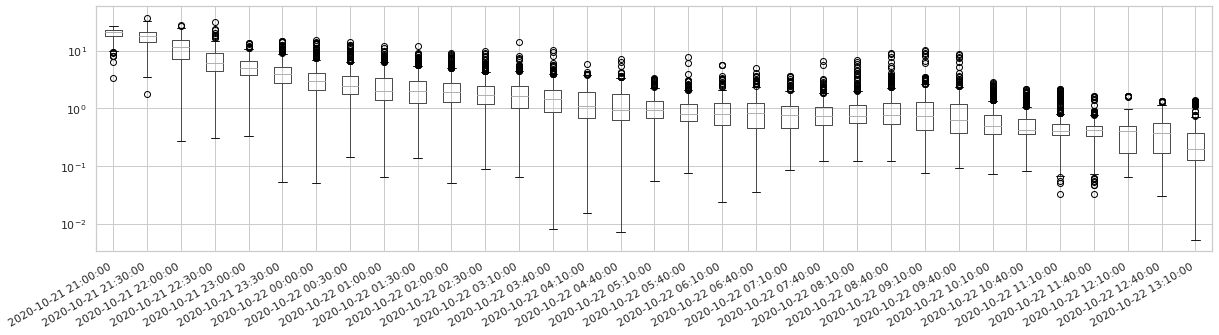

In [17]:
%autoreload
volcplot.make_boxplot(np.arange(2,100,3))

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


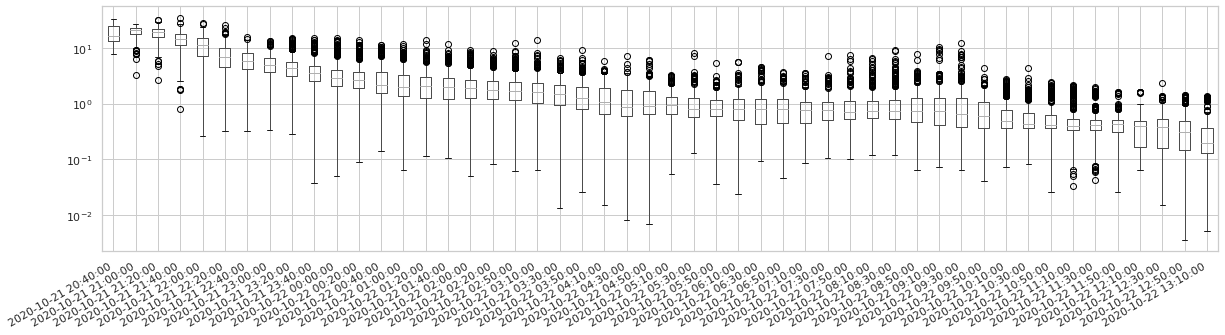

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


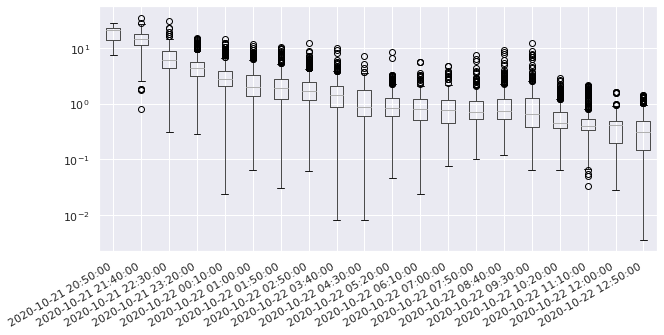

In [18]:
sns.set_style('whitegrid')
fig = plt.figure(1,figsize=(20,5))
volcplot.dj.iloc[:,np.arange(0,100,2)].boxplot()
ax = plt.gca()
ax.set_yscale('log')
d1 = datetime.datetime(2020,10,21,20)
d2 = datetime.datetime(2020,10,21,23)
#ax.set_xlim([d1,d2])
fig.autofmt_xdate()
plt.show()
sns.set()
fig = plt.figure(1,figsize=(10,5))
volcplot.dj.iloc[:,np.arange(1,100,5)].boxplot()
ax = plt.gca()
ax.set_yscale('log')
d1 = datetime.datetime(2020,10,21,20)
d2 = datetime.datetime(2020,10,21,23)
#ax.set_xlim([d1,d2])
fig.autofmt_xdate()

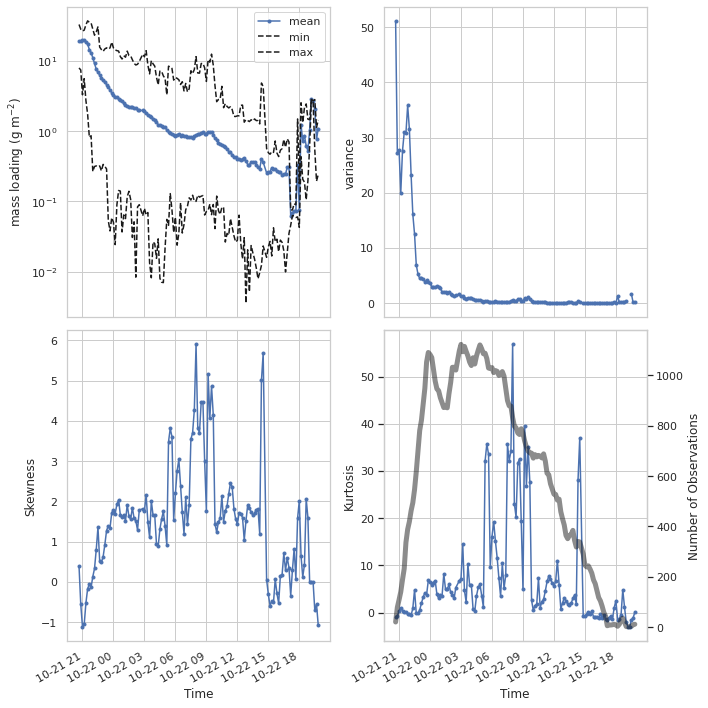

In [19]:
%autoreload

fig = volcplot.plot_dist_stats()

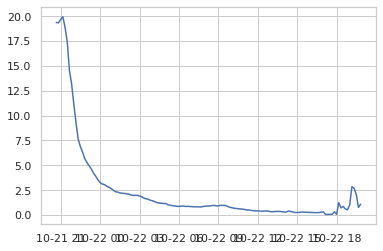

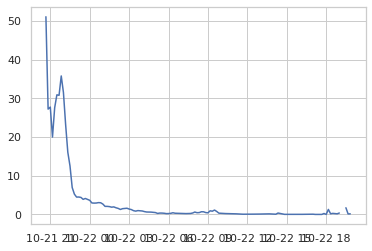

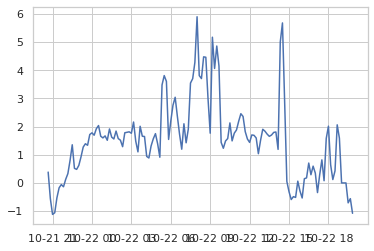

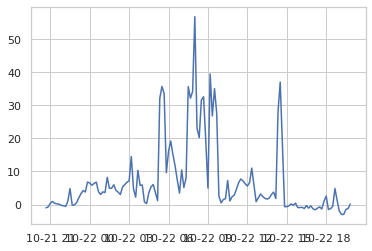

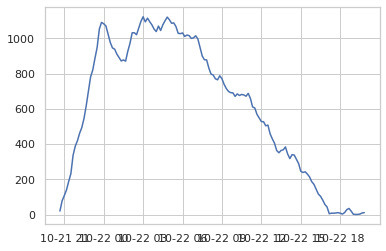

In [20]:

plt.plot(volcplot.dlist, df['mean'])
plt.show()
plt.plot(df.date,df['variance'])
plt.show()
plt.plot(df.date,df['skewness'])
plt.show()
plt.plot(df.date,df['kurtosis'])
plt.show()
plt.plot(df.date,df['N'])
plt.show()

### A few CDF plots

['2020-10-21T20:40:00.000000000']
['2020-10-21T21:30:00.000000000']
['2020-10-21T22:30:00.000000000']
['2020-10-22T00:00:00.000000000']
['2020-10-22T01:50:00.000000000']
['2020-10-22T13:40:00.000000000']


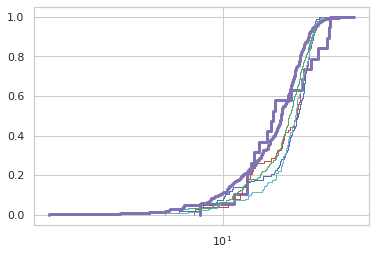

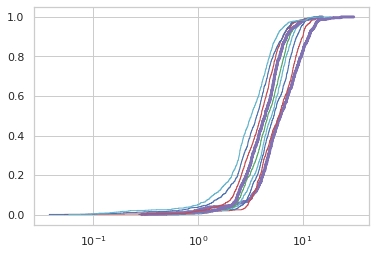

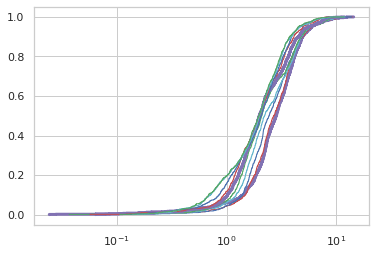

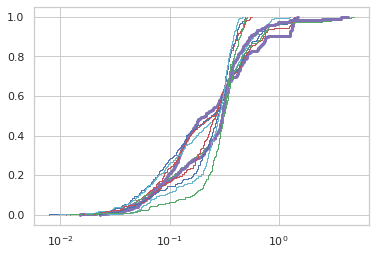

In [21]:
for iii in [0,5,11,20,31,101]:
    
    vht  = volcat.get_mass(das[iii],clip=True)
    print(vht.time.values)
%autoreload
ax = volcplot.volcat_cdf_plot(nums=[0,6])
ax.set_xscale('log')
plt.show()
ax = volcplot.volcat_cdf_plot(nums=[11,20])
ax.set_xscale('log')
plt.show()
ax = volcplot.volcat_cdf_plot(nums=[21,31])
ax.set_xscale('log')
plt.show()
ax = volcplot.volcat_cdf_plot(nums=[101,111])
ax.set_xscale('log')
plt.show()


## Figure 1

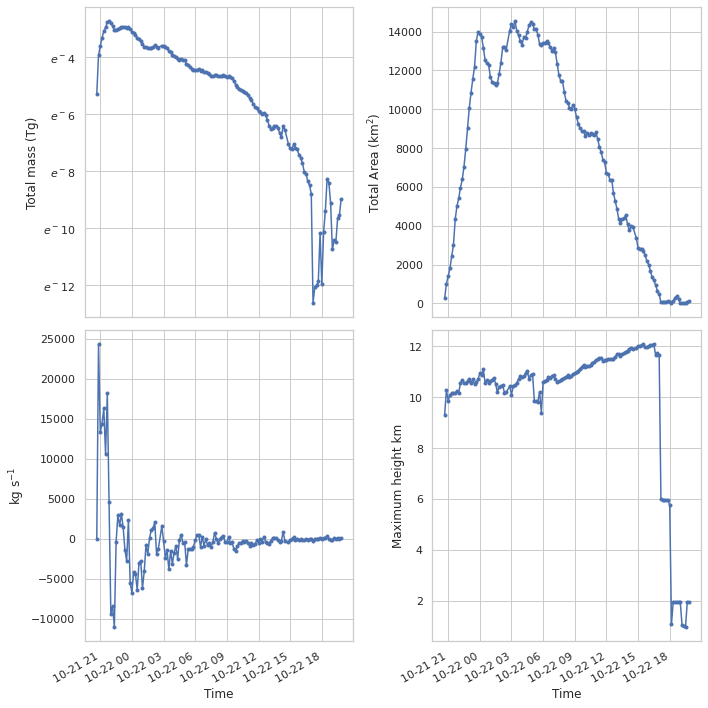

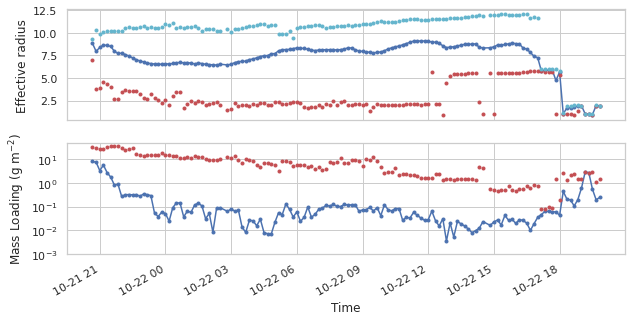

In [22]:
%autoreload
#volcplot.set_plot_settings()
fig1 = volcplot.plot_multiA(fignum=1,smooth=0.08,yscale='ln')
fig2 = volcplot.plot_multiB(fignum=2)
fig1.savefig('Bezy_volcat_plotA.png') ## This is for figure 1.
fig2.savefig('Bezy_volcat_plotB.png')

(737719.8333333334, 737720.0138888889)

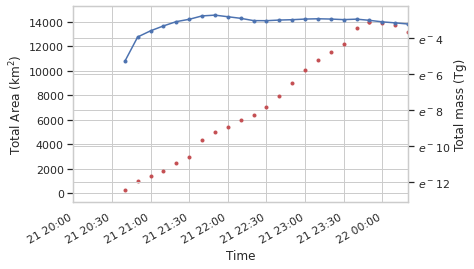

In [23]:
%autoreload
# Looking at Total Area and Total mass on same plot
fig = plt.figure(3)
d1 = datetime.datetime(2020,10,21,20,0)
d2 = datetime.datetime(2020,10,22,0,20)
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
volcplot.sub_plot_area(ax,clr=0)
volcplot.sub_plot_mass(ax2)
#ax.set_xlim(datetime.datetime(2020,10,21,20,30),d2)
ax.plot(datetime.datetime(2020,10,21,23,50),14000,'r.')
fig.autofmt_xdate()
ax.set_xlim(d1,d2)

### Fitting exponential decay to total mass

(0.00033546262790251196, 0.1353352832366127)

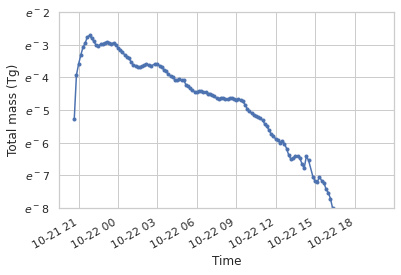

In [24]:
%autoreload
fig = plt.figure(4)
d1 = datetime.datetime(2020,10,21,20,0)
d2 = datetime.datetime(2020,10,22,0,20)
ax = fig.add_subplot(1,1,1)

volcplot.sub_plot_mass(ax)
fig.autofmt_xdate()
ax.set_ylim(np.e**(-8), np.e**(-2))

138
[22.16666667 22.33333333 22.5        22.66666667 22.83333333]
[0.         0.16666667 0.33333333 0.5        0.66666667]


[]

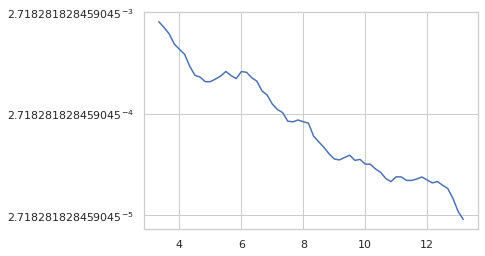

In [25]:
yval = volcplot.tmasslist
tval = volcplot.dlist
print(len(tval))
xval = np.arange(0,len(tval),1)/6.0
print(xval[-5:])
print(xval[0:5])
imin = 20
imax = 80
plt.plot(xval[imin:imax],yval[imin:imax])
ax = plt.gca()
ax.semilogy(basey=np.e)

In [26]:
%autoreload
k,A = volcplot.fit_exp_decay(xval[imin:imax],yval[imin:imax])

In [27]:
# half life. unit is hours.
half_life = -1/k * np.log(2)
print(half_life)

4.003342201528832


In [28]:
half_life/24.0

0.16680592506370132